<H3>Question 1 - Which type of complaints The Department of Housing Preservation and Development of New York City should focus first?</H3>


What Is the Top Complaint Type?
The goal of this exercise is to find the answer to the Question 1 of the problem statement:

Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?

In this exercise, you need to read back the 311 datasets that you stored in Cloud Object Store and explore the dataset.

By the end of this exercise, you need to figure out the correct Complaint Type that the Department of Housing Preservation and Development of New York City should focus on.

Add the answer to this question along with code and comments in a notebook. Upload the notebook in the subsection called "Question 1 - Which type of complaints The Department of Housing Preservation and Development of New York City should focus first?"  in the section "Submit your work and Review your Peer's work' in module 'Submit Your Work and Grade Your Peers".




<h4>Step 1: Let´s import all required libraries.</h4>

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')


<h4>Step 2: Let´s Load local dataset.</h4>

In [2]:
other_path = "311_SRNY.csv"
df_311 = pd.read_csv(other_path, low_memory=False)


<h4>Step 3: Let´s show data. For the example, the last month has been selected June 2020.</h4>

In [3]:
print(df_311.shape)
df_311.head()

(273623, 41)


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,46354403,06/01/2020 12:00:00 AM,06/01/2020 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,1 or 2,Restaurant/Bar/Deli/Bakery,11373.0,84-60 GRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.734668,-73.882386,"(40.73466849726108, -73.88238649994325)"
1,46353932,06/01/2020 12:00:09 AM,06/01/2020 12:28:27 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,NaN,10452.0,963 WOODCREST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.831670,-73.928754,"(40.831669762919574, -73.9287544719845)"
2,46347652,06/01/2020 12:00:14 AM,NaN,DPR,Department of Parks and Recreation,Overgrown Tree/Branches,Hitting Power/Phone Lines,Street,10456.0,1256 FINDLAY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.833955,-73.911641,"(40.8339552463753, -73.91164108592754)"
3,46353552,06/01/2020 12:00:19 AM,06/01/2020 12:18:55 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11433.0,107-16 166 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699063,-73.789418,"(40.6990626352383, -73.78941841859765)"
4,46349200,06/01/2020 12:00:21 AM,06/01/2020 02:09:57 PM,DOT,Department of Transportation,Sidewalk Condition,Broken Sidewalk,Sidewalk,11224.0,3069 CROPSEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.580273,-73.985568,"(40.58027340758124, -73.9855676522687)"


<h4>Step 4: Let's check the data types of each column. For this, we can use the dtypes function as follows</h4>

In [4]:
df_311.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                      float64
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   


<h4>Step 5: let's check if the column "complaint_type" contains null or missing values</h4>

In [5]:
df_311['Complaint Type'].isnull().sum()


0

<h4><p>Step 6: Let's calculate the frequencies for each complaint and its respective percentage.<p> 
    <p>To do this, we can use the value_counts () function and then we can divide each value by total complaints.<p>
    <p>We can see the top 1 of complaints is "Noise - Street/Sidewalk".<p></h4>

In [5]:
df_complaint = df_311['Complaint Type'].value_counts()
df_complaint = df_complaint.to_frame()
df_complaint['Percent'] = df_complaint['Complaint Type']/df_complaint['Complaint Type'].sum()*100
df_complaint


,Complaint Type,Percent
Noise - Street/Sidewalk,45424,16.600944
Noise - Residential,41557,15.187685
Illegal Fireworks,29235,10.684409
Non-Emergency Police Matter,15870,5.799951
Illegal Parking,14141,5.168060
Noise - Vehicle,10485,3.831915
Blocked Driveway,7530,2.751962
Street Light Condition,6202,2.266622
UNSANITARY CONDITION,5243,1.916140
Damaged Tree,4710,1.721347


<h4>Step 7: Let's check if the sum of the percentages represents 100% of the complaints.</h4>

In [6]:
display('The sum of percents is %.2f' %(df_complaint['Percent'].sum()))

'The sum of percents is 100.00'

<h4>Step 8: To improve data visualization, we will show only the five most frequent complaints, using the head () function.</h4>

In [7]:
df_311_complaint = df_311['Complaint Type'].value_counts()
df_311_complaint = df_311_complaint.head()
df_311_complaint.sort_values(ascending = True, inplace =True)

<h4><p>Step 9: Finally, we graph the results with the 5 most frequent categories of complaints, using horizontal bars and showing the value<p><p>as well as their respective percentage iteratively within a "for" control structure.<p></b>

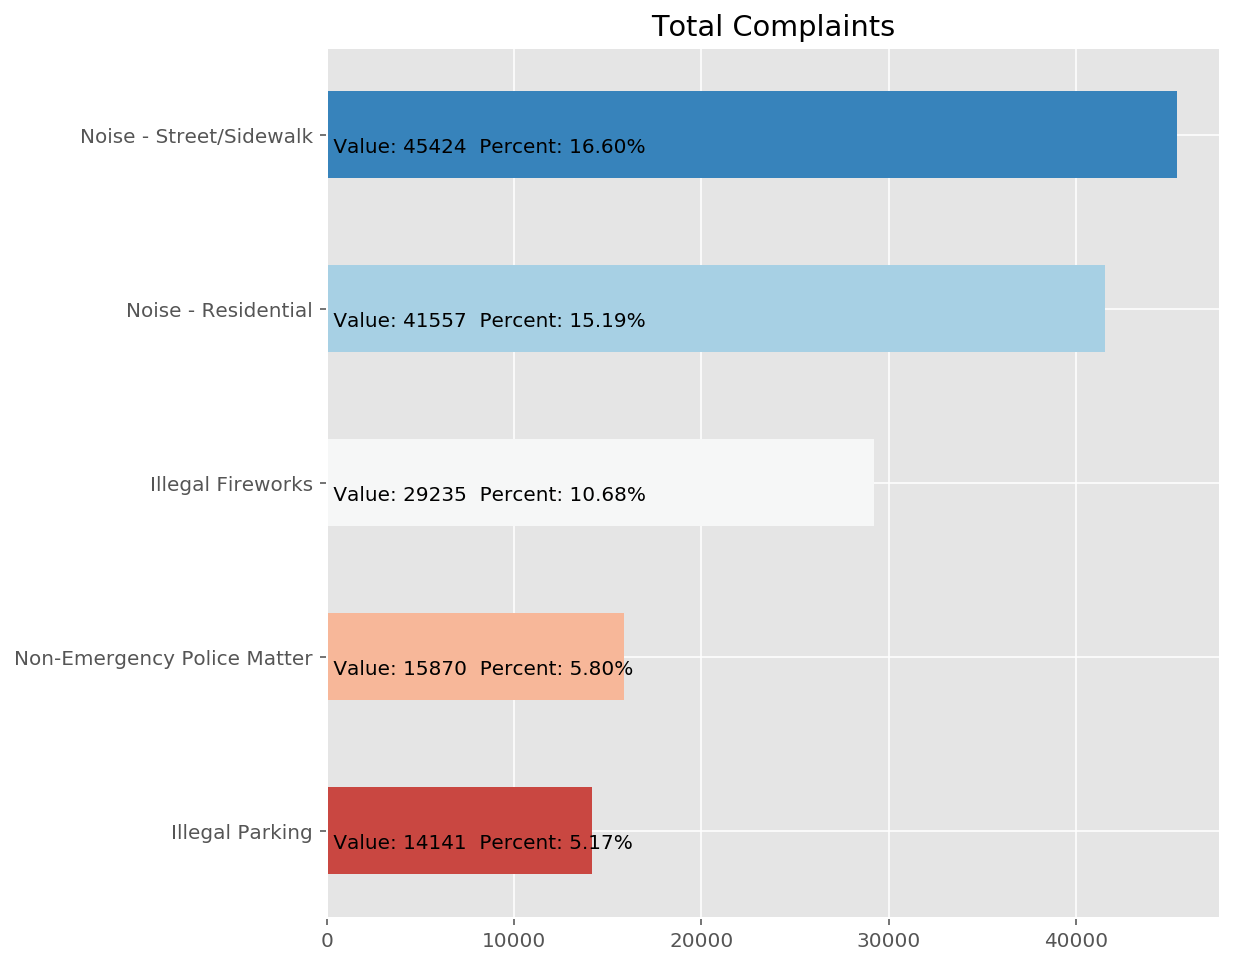

In [24]:
Total_complaint = df_complaint.sum()
df_311_complaint.plot(kind = 'barh', figsize = (8,8), color=sns.color_palette("RdBu", len(df_311_complaint)))
plt.title('Total Complaints')
x=np.array(df_311_complaint.tolist()) #convert to list
for index, value in enumerate(x):
    y = value/Total_complaint
    y=np.array(y.tolist()) #convert to list
    label=(y[0]*100)
    labelX =("{:.2f}%".format(label))
    value= str(value)
    labelX = ' Value: '+value+ '  Percent: '+labelX  
    plt.annotate(labelX, xy=(label, index-0.1), color='black')
plt.show()

<h3> Answer:</h3>

<h4>The Department of Housing Preservation and Development of NYC should first focus on "Noise - Street/Sidewalk"  complaints since they make up about 16,6% of all the complaints filed. Second they should focus on Noise - Residential </h4>